# 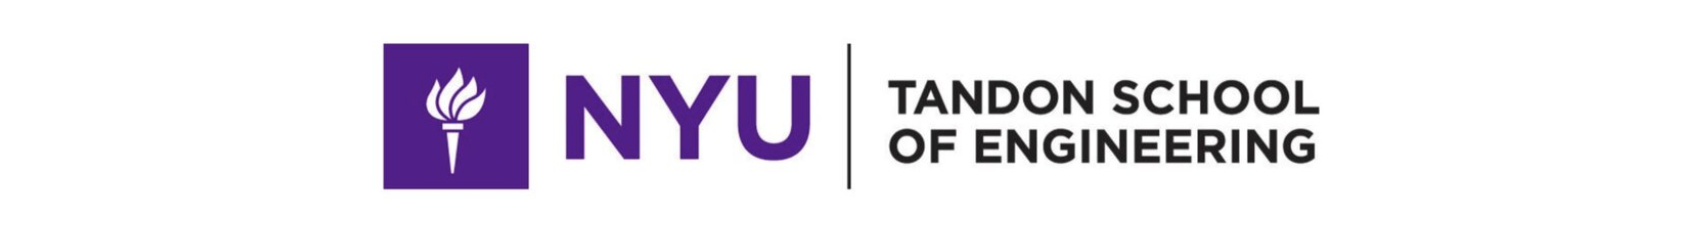

# Reducing Customer Churn in Retail with Personalized Incentives

### Big Data (CSGY-6513-C) | Fall 2024
##### Team Members: 
* Abhishek Agrawal aa9360 
* Shubham Naik svn9724 
* Vaibhav Rouduri vr2470

In [6]:
# Installing Libraries
# %%bash
pip3 install pandas
pip3 install numpy
pip3 install matplotlib
pip3 install seaborn
pip3 install plotly
pip3 install scikit-learn
pip3 install xgboost

SyntaxError: invalid syntax (4056056785.py, line 1)

In [8]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Exploratory Data Analysis
The dataset consist of eight tables in separate .csv files, we will go through six of them which we will use in this notebook. The dataset covers a two year span purchase transactions of 2500 households. Also demographics information of households, campaign and coupon redemption informations are available. In the modeling phase we will join these tables to make our final dataset.

* Campaign Descriptions (campaigndesc.csv)
* Campaigns (campaign_table.csv)
* Coupons (coupon.csv)
* Coupon Redemptions (coupon_redempt.csv)
* Transactions (transaction_data.csv)
* Demographics (hh_demographic.csv)

In [122]:
household = pd.read_csv("hh_demographic.csv")
transaction = pd.read_csv("transaction_data.csv")
transaction = transaction.merge(household, on="household_key", how="inner")
transaction.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown


In [123]:
campaign_desc = pd.read_csv("campaign_desc.csv")
campaign_table = pd.read_csv("campaign_table.csv")
campaign_detail = campaign_table.merge(campaign_desc, on="DESCRIPTION", how="inner")
campaign_desc.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [124]:
total_households = 2500

In [158]:
no_of_received_campaigns_per_house = campaign_table.household_key.value_counts().to_frame()
no_of_received_campaigns = no_of_received_campaigns_per_house.value_counts()
no_of_received_campaigns[0] = total_households-len(no_of_received_campaigns_per_house)

In [165]:
no_of_received_campaigns_per_house.sort_values(by='count').to_csv("no_of_received_campaigns_per_house.csv")
no_of_received_campaigns = pd.DataFrame(list(zip([x[0] for x in no_of_received_campaigns.index], no_of_received_campaigns))
                                        ,columns=["Number of Campaigns Received",
                                                  "Number of Households Reached To"]).sort_values(by="Number of Campaigns Received",ascending=True)


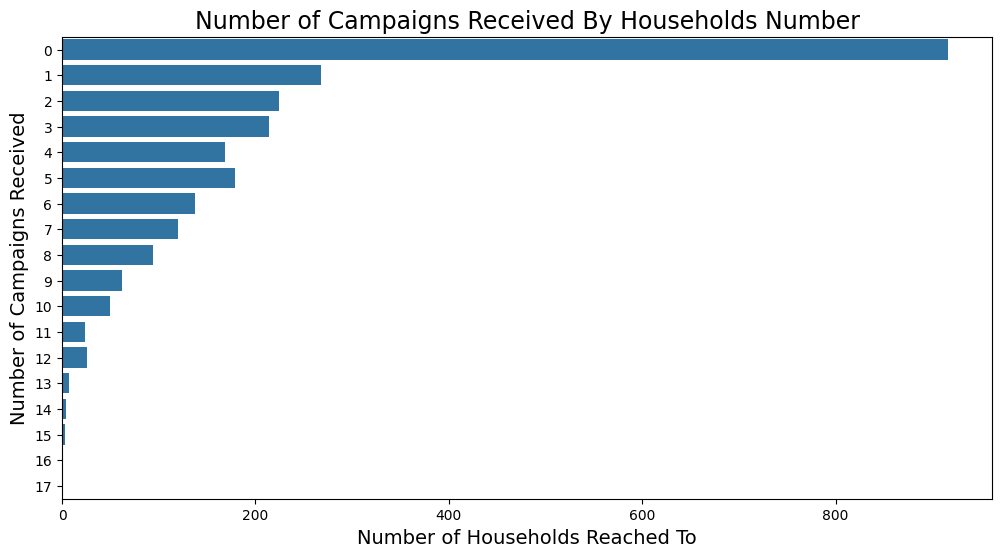

In [166]:
plt.figure(figsize=(12,6))
sns.barplot(y="Number of Campaigns Received",x="Number of Households Reached To",data=no_of_received_campaigns,orient="h",order=no_of_received_campaigns["Number of Campaigns Received"])
plt.title('Number of Campaigns Received By Households Number', fontsize=17)
plt.xlabel('Number of Households Reached To', fontsize=14)
plt.ylabel('Number of Campaigns Received', fontsize=14)
plt.show()

In [167]:
campaign_detail.head().to_csv("campaign_detail.csv")

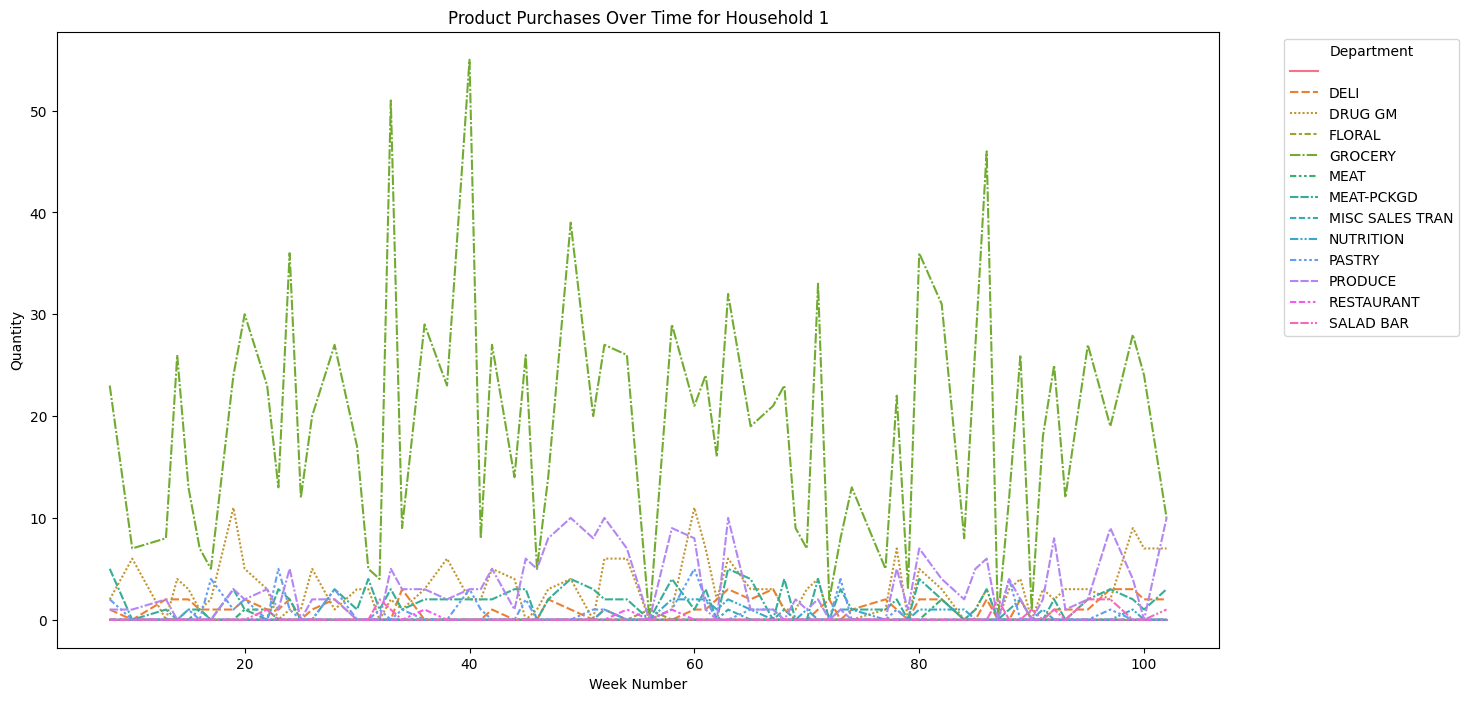

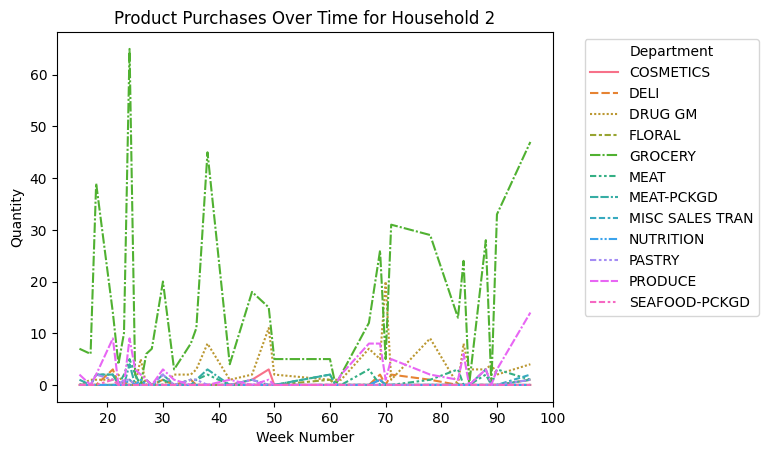

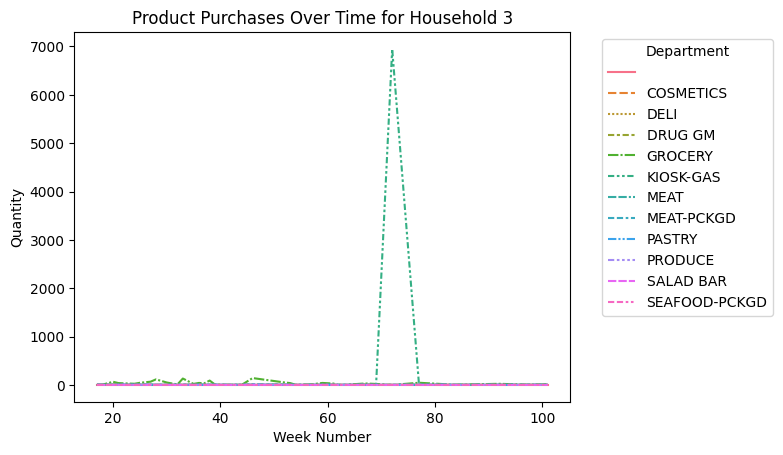

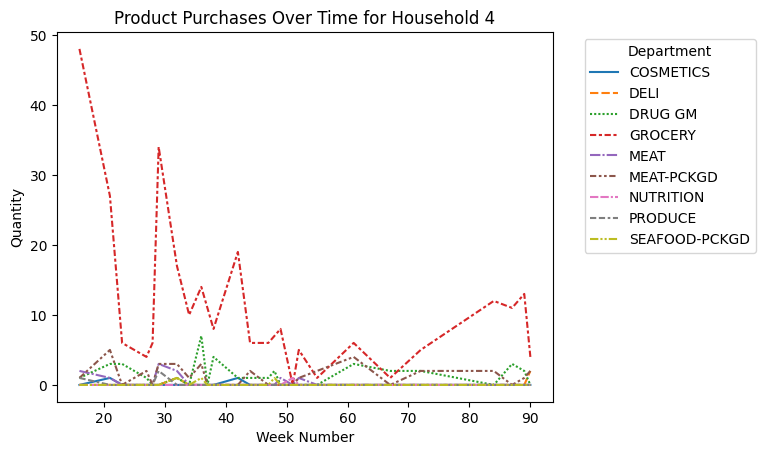

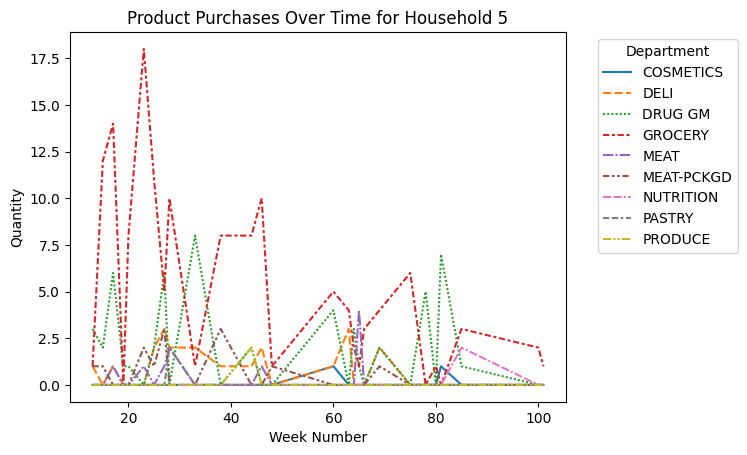

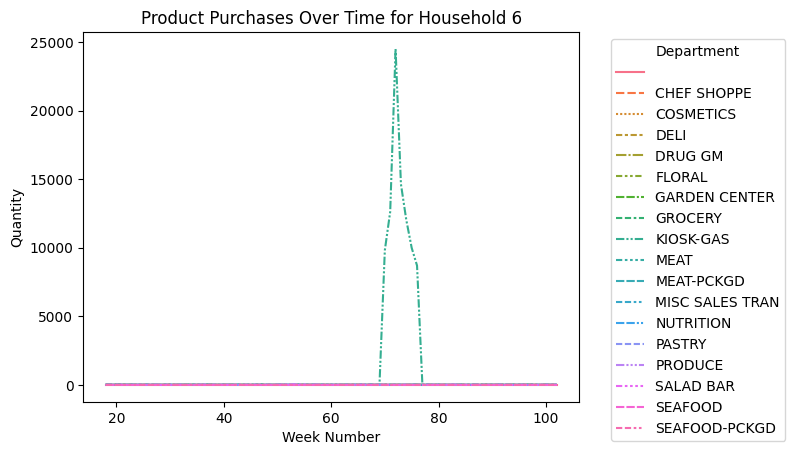

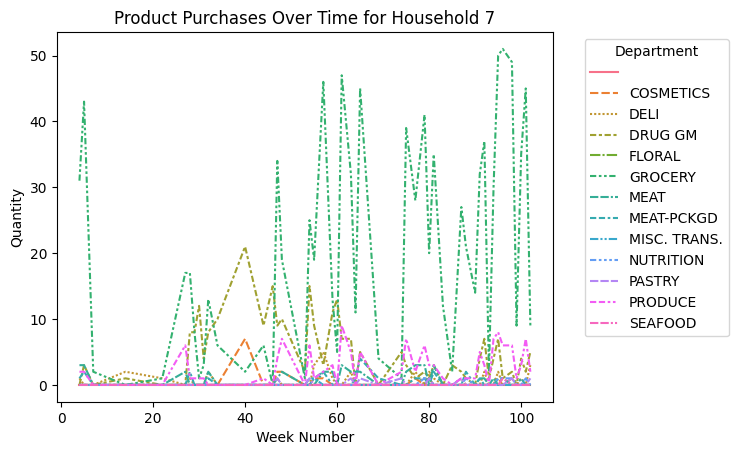

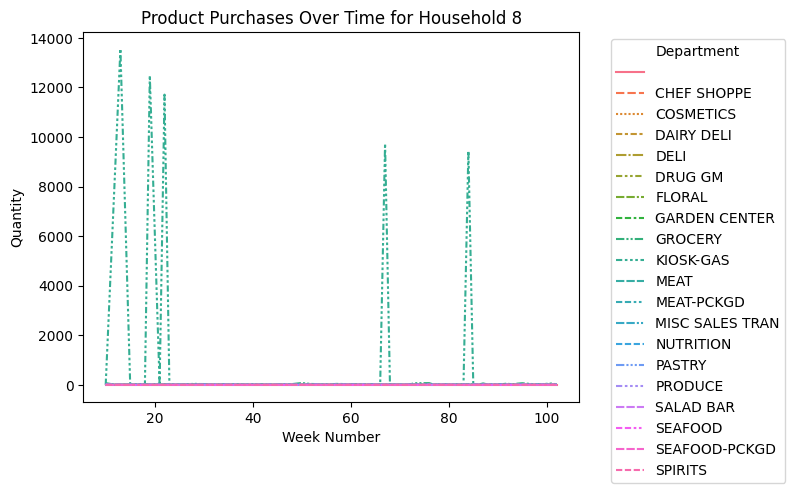

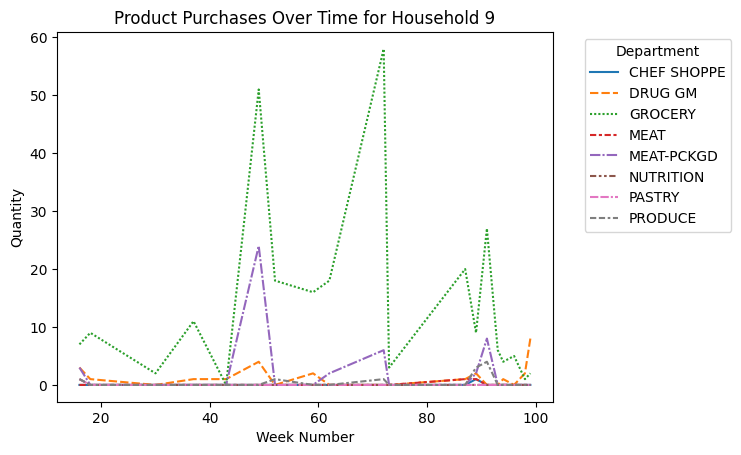

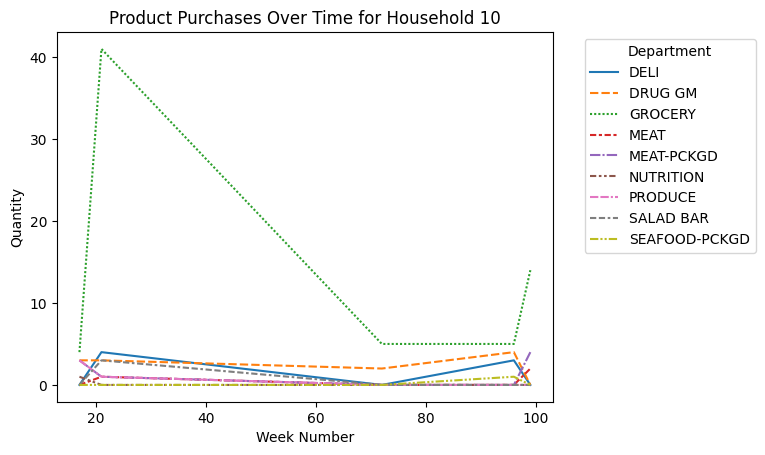

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transactions = pd.read_csv('transaction_data.csv')
products = pd.read_csv('product.csv')

merged_data = transactions.merge(products, on='PRODUCT_ID')
household_product_trends = merged_data.groupby(['household_key', 'WEEK_NO', 'DEPARTMENT'])['QUANTITY'].sum().reset_index()
plt.figure(figsize=(15, 8))
for household_key in household_product_trends['household_key'].unique()[:10]:
    household_data = household_product_trends[household_product_trends['household_key'] == household_key]
    pivot_data = household_data.pivot(index='WEEK_NO', columns='DEPARTMENT', values='QUANTITY').fillna(0)

    sns.lineplot(data=pivot_data)
    plt.title(f'Product Purchases Over Time for Household {household_key}')
    plt.xlabel('Week Number')
    plt.ylabel('Quantity')
    plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [188]:
household_1_data

,household_key,WEEK_NO,DEPARTMENT,QUANTITY
0,1,8,DELI,1
1,1,8,DRUG GM,2
2,1,8,GROCERY,23
3,1,8,MEAT-PCKGD,5
4,1,8,PASTRY,2
...,...,...,...,...
327,1,102,DRUG GM,7
328,1,102,GROCERY,10
329,1,102,MEAT-PCKGD,3
330,1,102,PRODUCE,10


In [195]:
household_product_trends.head().to_csv("household_product_trends.csv")


In [8]:
transactions = pd.read_csv('transaction_data.csv')
products = pd.read_csv('product.csv') 

# merged_data = transactions.merge(products, on='PRODUCT_ID')

In [34]:
transactions.groupby(['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC']).size()
# transactions['COUPON_DISC'].unique()
# transactions['COUPON_MATCH_DISC'].unique()


COUPON_MATCH_DISC
-7.70          1
-5.80          1
-5.40          1
-5.00          1
-4.95          1
          ...   
-0.10          9
-0.08          1
-0.02          1
-0.01          3
 0.00    2578283
Length: 80, dtype: int64

In [122]:
features = transactions.groupby(['household_key', 'BASKET_ID', 'STORE_ID', 'DAY', 'WEEK_NO']).agg({'QUANTITY': 'sum', 'SALES_VALUE': 'sum', 'RETAIL_DISC': 'sum', 'COUPON_DISC': 'sum', 'COUPON_MATCH_DISC': 'sum'}).reset_index()
features

# RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC

# import matplotlib.pyplot as plt

# Group by household_key and WEEK_NO, then sum the features
# weekly_features = features.groupby(['household_key', 'WEEK_NO']).sum().reset_index()

# # Plot features with respect to week for every household
# for household_key in weekly_features['household_key'].unique()[:1]:
#     household_data = weekly_features[weekly_features['household_key'] == household_key]
#     plt.figure(figsize=(15, 8))
#     plt.plot(household_data['WEEK_NO'], household_data['QUANTITY'], label='Quantity')
#     plt.plot(household_data['WEEK_NO'], household_data['SALES_VALUE'], label='Sales Value')
#     plt.title(f'Features Over Time for Household {household_key}')
#     plt.xlabel('Week Number')
#     plt.ylabel('Value')
#     plt.legend()
#     plt.show()

# Recency: Days since the last purchase.
# Frequency: Number of transactions over a defined period (e.g., past 30/60/90 days).
# Monetary Value: Total spending over a defined period.
# Average Basket Size: Average number of items per basket.
# Discount Utilization: Average discount per transaction.

,household_key,BASKET_ID,STORE_ID,DAY,WEEK_NO,QUANTITY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC
0,1,27601281299,436,51,8,34,78.66,-16.54,-1.0,0.0
1,1,27774192959,436,67,10,14,41.10,-8.59,0.0,0.0
2,1,28024266849,436,88,13,13,26.90,-6.72,0.0,0.0
3,1,28106322445,436,94,14,32,63.43,-11.08,-1.5,-0.5
4,1,28235481967,436,101,15,20,53.45,-16.42,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
276479,2500,42076591137,447,695,100,2,4.00,-0.98,0.0,0.0
276480,2500,42115225458,327,698,100,12,50.54,-14.72,-2.0,0.0
276481,2500,42198526427,447,704,101,31,73.65,-19.79,-1.7,-1.1
276482,2500,42229520973,447,706,102,6,13.95,-0.42,0.0,0.0


In [50]:
features[features['household_key'] == 1].to_csv("features_household_1.csv")

In [9]:
transactions = pd.read_csv('transaction_data.csv')
demographics = pd.read_csv('hh_demographic.csv')
products = pd.read_csv('product.csv')

In [10]:
transaction_trends = transactions.groupby(['household_key', 'BASKET_ID', 'STORE_ID', 'DAY', 'WEEK_NO']).agg({
                            'QUANTITY': 'sum', 'SALES_VALUE': 'sum', 'RETAIL_DISC': 'sum', 'COUPON_DISC': 'sum', 'COUPON_MATCH_DISC': 'sum'}).reset_index()
transaction_trends

,household_key,BASKET_ID,STORE_ID,DAY,WEEK_NO,QUANTITY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC
0,1,27601281299,436,51,8,34,78.66,-16.54,-1.0,0.0
1,1,27774192959,436,67,10,14,41.10,-8.59,0.0,0.0
2,1,28024266849,436,88,13,13,26.90,-6.72,0.0,0.0
3,1,28106322445,436,94,14,32,63.43,-11.08,-1.5,-0.5
4,1,28235481967,436,101,15,20,53.45,-16.42,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
276479,2500,42076591137,447,695,100,2,4.00,-0.98,0.0,0.0
276480,2500,42115225458,327,698,100,12,50.54,-14.72,-2.0,0.0
276481,2500,42198526427,447,704,101,31,73.65,-19.79,-1.7,-1.1
276482,2500,42229520973,447,706,102,6,13.95,-0.42,0.0,0.0


In [77]:
# Recency: Days since the last purchase.
# Frequency: Number of transactions over a defined period (e.g., past 30/60/90 days).
# Monetary Value: Total spending over a defined period.
# Average Basket Size: Average number of items per basket.
# Discount Utilization: Average discount per transaction.

latest_week = int(max(transaction_trends['WEEK_NO'].unique()))
def churn_probability(x):
  if x < 4:
    return round(x/4, 2)
  return 1.00

features = transaction_trends.groupby(['household_key']).agg(
  latest_week_no=('WEEK_NO', 'max'),
  total_weeks=('WEEK_NO', 'nunique'),
  total_quantity=('QUANTITY', 'sum'),
  count_retail_disc=('RETAIL_DISC', lambda x: (x != 0.0).sum()),
  count_coupon_disc=('COUPON_DISC', lambda x: (x != 0.0).sum()),
  count_coupon_match_disc=('COUPON_MATCH_DISC', lambda x: (x != 0.0).sum()),
  total_sales_value=('SALES_VALUE', 'sum'),
  total_retail_disc=('RETAIL_DISC', 'sum'),
  total_coupon_disc=('COUPON_DISC', 'sum'),
  total_coupon_match_disc=('COUPON_MATCH_DISC', 'sum'),
  basket_count=('BASKET_ID', 'count')
).reset_index().merge(demographics, on='household_key', how='left')

churn_features = features[['household_key']].copy()
churn_features['frequency'] = features['basket_count'] / features['total_weeks']
churn_features['monetary_value'] = features['total_sales_value'] / features['total_weeks']
churn_features['average_basket_size'] = features['total_quantity'] / features['basket_count']
churn_features['discount_utilization'] = (features['total_retail_disc'] + features['total_coupon_disc'] + features['total_coupon_match_disc']) / features['basket_count']
churn_features['discount_count'] = (features['count_retail_disc'] + features['count_coupon_disc'] + features['count_coupon_match_disc']) / features['basket_count']

churn_features['recency'] = latest_week - features['latest_week_no']
churn_features['churn_probability'] = churn_features['recency'].apply(lambda x: churn_probability(x))
churn_features['is_churn'] = churn_features['churn_probability'] == 1

churn_features

,household_key,frequency,monetary_value,average_basket_size,discount_utilization,discount_count,recency,churn_probability,is_churn
0,1,1.264706,63.678824,23.220930,-9.345930,1.453488,0,0.00,False
1,2,1.285714,55.838286,18.533333,-7.644222,1.044444,6,1.00,True
2,3,1.270270,71.708378,181.702128,-16.088298,1.191489,1,0.25,False
3,4,1.153846,46.158077,12.733333,-3.938333,0.966667,12,1.00,True
4,5,1.481481,28.854074,6.125000,-2.958250,0.750000,1,0.25,False
...,...,...,...,...,...,...,...,...,...
2495,2496,1.312500,90.409583,2068.317460,-18.715714,1.507937,4,1.00,True
2496,2497,2.569767,82.697442,277.085973,-6.147602,0.895928,1,0.25,False
2497,2498,2.567164,38.829851,182.203488,-1.624419,0.720930,0,0.00,False
2498,2499,1.666667,62.853148,1593.877778,-5.578889,0.844444,0,0.00,False


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X, y = churn_features.drop(columns=['is_churn', 'churn_probability', 'recency', 'household_key']), churn_features['is_churn']
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

n_splits = 6
acc_val = np.zeros((n_splits))
kf = KFold(n_splits=n_splits, random_state=None, shuffle=False)
for fold_index, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_val = X.iloc[train_index], X.iloc[test_index]
  y_train, y_val = y.iloc[train_index], y.iloc[test_index]
  model = RandomForestClassifier(n_estimators=200, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  acc_val[fold_index] = accuracy_score(y_val, y_pred)

print(f"Accuracy: {acc_val.max()}")

Accuracy: 0.8125


In [73]:
print("Best Accuracy:", model.feature_importances_)

Best Accuracy: [0.24045699 0.19231304 0.19934855 0.18565883 0.1822226 ]


In [65]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(Xtr, ytr)
logistic_y_pred = logistic_model.predict(Xts)
logistic_acc = accuracy_score(yts, logistic_y_pred)

print(f"Logistic Regression Accuracy: {logistic_acc}")

Logistic Regression Accuracy: 0.788


In [66]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(Xtr, ytr)
mlp_y_pred = mlp_model.predict(Xts)
mlp_acc = accuracy_score(yts, mlp_y_pred)

print(f"MLP Neural Network Accuracy: {mlp_acc}")

MLP Neural Network Accuracy: 0.786


In [105]:
print("Best Hyperparameters:", model.best_params_)
print("Best Accuracy:", model.best_score_)

Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.806
